In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [98]:
def mean(sequence: list[float, ...]) -> float:
    assert isinstance(sequence, list)
    return sum(sequence) / len(sequence)

def variance(sequence: list[float, ], *, power: float =2.) -> float:
    assert isinstance(sequence, list)
    _mean = mean(sequence=sequence)
    _squared_sum = sum((v - _mean) ** power for v in sequence)
    _variance = _squared_sum / (len(sequence) - 1)
    return _variance 

def std(sequence: list[float, ...], *, power: float = 2.) -> float:
    _variance = variance(sequence=sequence, power=power)
    _std = _variance ** (1/power)
    return _std

def median(sequence: list[float, ...]) -> float:
    sequence.sort()
    _median = sequence[(len(sequence) >> 1) - int(not len(sequence) & 1): (len(sequence) >> 1) + 1]
    return sum(_median) / len(_median)

def get_random_color():
    color = "#{:02X}{:02X}{:02X}".format(
    np.random.randint(0, 256),
    np.random.randint(0, 256),
    np.random.randint(0, 256),
    )
    return color

In [3]:
data_frame = pd.read_csv('group_2.csv')

In [4]:
data_frame.columns = data_frame.columns.str.replace(" ", "_").str.lower()

In [56]:
data_frame

,job_title,employment_type,experience_level,expertise_level,salary,salary_currency,company_location,salary_in_usd,employee_residence,company_size,year
0,Machine Learning Manager,Full-Time,Senior,Expert,120000,Euro,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Junior,50000,USD,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,Expert,227850,USD,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,180500,USD,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,Intermediate,90000,USD,United States,90000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3465,Data Scientist,Full-Time,Senior,Expert,412000,USD,United States,412000,United States,Large,2020
3466,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,USD,United States,151000,United States,Large,2021
3467,Data Scientist,Full-Time,Entry,Junior,105000,USD,United States,105000,United States,Small,2020
3468,Business Data Analyst,Contract,Entry,Junior,100000,USD,United States,100000,United States,Large,2020


In [6]:
dummy_frame = data_frame.copy()

In [7]:
def short_cut(string: str | None) -> str:
    if string is None:
        return None
    string = string.split()
    if len(string) == 1:
        return string[0]
    return "".join(string[0] for string in string)

In [8]:
data_frame.salary_currency = data_frame.salary_currency.apply(short_cut)

In [9]:
data_frame.job_title = data_frame.job_title.replace({'Data Modeller': 'Data Modeler'})

In [10]:
data_frame.head(10)

,job_title,employment_type,experience_level,expertise_level,salary,salary_currency,company_location,salary_in_usd,employee_residence,company_size,year
0,Machine Learning Manager,Full-Time,Senior,Expert,120000,Euro,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Junior,50000,USD,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,Expert,227850,USD,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,180500,USD,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,Intermediate,90000,USD,United States,90000,United States,Medium,2023
5,Data Analyst,Full-Time,Mid,Intermediate,70000,USD,United States,70000,United States,Medium,2023
6,Data Engineer,Full-Time,Senior,Expert,199000,USD,United States,199000,United States,Medium,2023
7,Data Engineer,Full-Time,Senior,Expert,159000,USD,United States,159000,United States,Medium,2023
8,Data Lead,Full-Time,Senior,Expert,350000,USD,United States,350000,United States,Medium,2023
9,Data Lead,Full-Time,Senior,Expert,80000,USD,United States,80000,United States,Medium,2023


# #20 Calculate the variance of salaries for Senior Data Engineers

In [12]:
senior_data_engineers = data_frame[(data_frame.job_title == 'Data Engineer') & (data_frame.experience_level == 'Senior')]
variance_salaries = variance(sequence=list(senior_data_engineers.salary_in_usd))
print(f'variance of salaries is {variance_salaries:,}')

variance of salaries is 3,420,280,946.3662577


# #24 What is the distribution of job titles among Senior-level employees

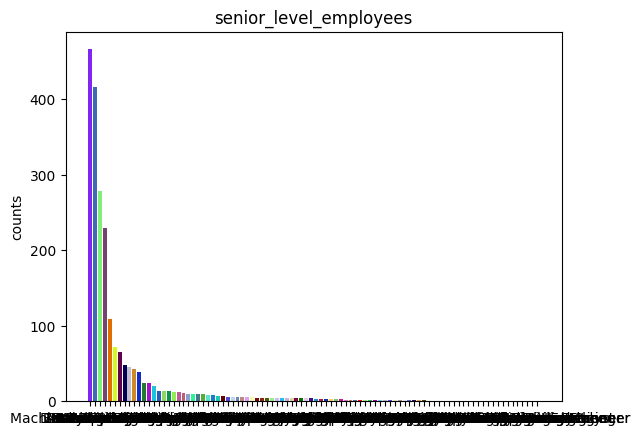

In [65]:
senior_level_employees = data_frame[data_frame.experience_level.str.contains('Senior')].job_title.value_counts().reset_index()
job_titles = list(senior_level_employees.job_title)
counts = list(senior_level_employees['count'])
colors = [get_random_color() for _ in range(len(counts))]

fig, ax = plt.subplots()
ax.bar(job_titles, counts, color=colors)
ax.set_ylabel('counts')
ax.set_title('senior_level_employees')
plt.show()

# #25 Which job title has the highest number of Full-Time employees?

In [48]:
full_time = data_frame[dummy_frame.employment_type == 'Full-Time'].groupby('job_title').employment_type.count().reset_index()
full_time.columns = ['job_title', 'amount']
full_time = full_time.sort_values(by='amount', ascending=False)
full_time.iloc[0]

job_title    Data Engineer
amount                 729
Name: 40, dtype: object

# #26 How many employees have Expert-level expertise?


In [55]:
expert_level_expertise = data_frame[data_frame.expertise_level == 'Expert'].shape[0]
print(f'expert_level_expertise={expert_level_expertise:,}')

expert_level_expertise=2,187


# #27 What is the distribution of Employment Types for Data Scientists?

employment_type
Full-Time    662
Part-Time      3
Freelance      1
Name: count, dtype: int64


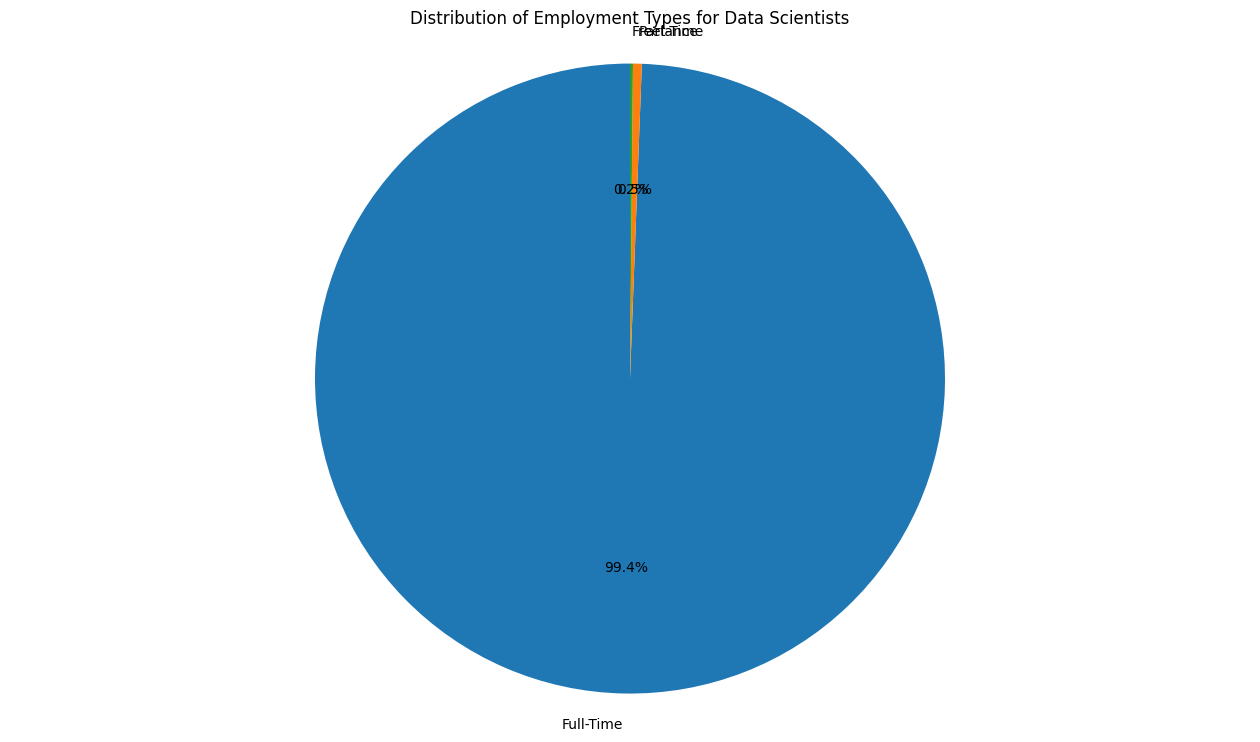

In [73]:
data_scientists = data_frame[data_frame.job_title == 'Data Scientist'].employment_type.value_counts()
print(data_scientists)

plt.figure(figsize=(16, 9))  
plt.pie(data_scientists, labels=data_scientists.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Employment Types for Data Scientists')
plt.axis('equal') 
plt.show()

# #28 How many different company locations are represented in this dataset

company_location
United States                2616
United Kingdom                266
Canada                        123
Germany                        68
Spain                          50
                             ... 
Hong Kong                       1
Armenia                         1
Bahamas                         1
Iran, Islamic Republic of       1
Malta                           1
Name: count, Length: 71, dtype: int64


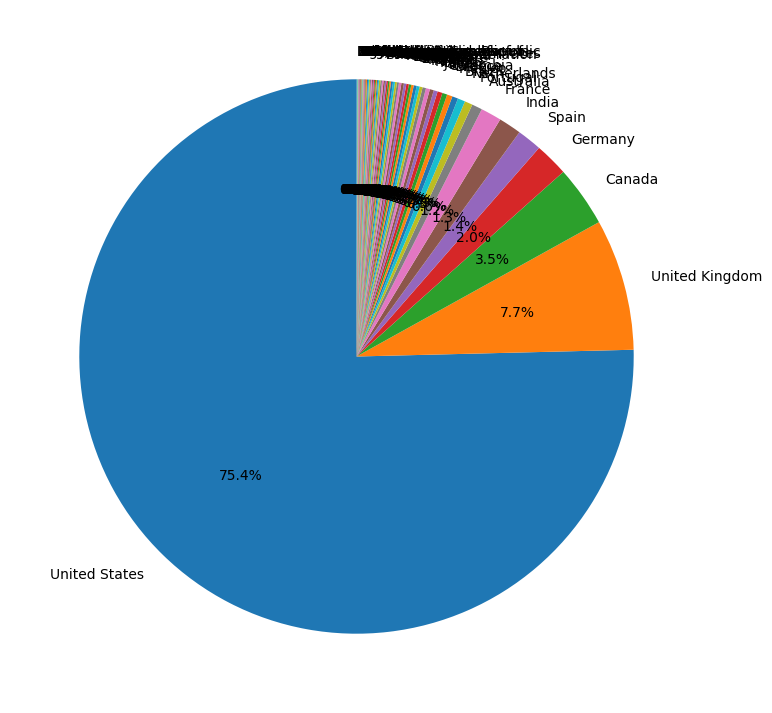

In [85]:
company_locations = data_frame.company_location.value_counts()
print(company_locations)
plt.figure(figsize=(16, 9))  
plt.pie(company_locations, labels=company_locations.index, autopct='%1.1f%%', startangle=90)
ax.set_ylabel('counts')
ax.set_title('senior_level_employees')
plt.show()

# #32 What is the median salary for Entry-level Data Scientists in the United Kingdom?


In [101]:
data_for_uk = data_frame[(data_frame.company_location == 'United Kingdom') & (data_frame.experience_level == 'Entry') & (data_frame.job_title == 'Data Scientist')].salary_in_usd
# & (data_frame.experience_level == 'Entry') & (data_frame.job_title == 'Data Scientists')
median_salary = median(list(data_for_uk))
print(f'median salary for Entry-level Data Scientist is {median_salary:,}')

median salary for Entry-level Data Scientist is 33,246.0


# # 33 How many Data Engineers have Expert-level expertise and work for Medium-sized companies?

In [111]:
expert_data_engineer = data_frame[(data_frame.job_title == 'Data Engineer') & (data_frame.expertise_level == 'Expert') & (data_frame.company_size == 'Medium')].shape[0]
print(f'number of expert data engineers in medium size companies is {expert_data_engineer:,}') 

number of expert data engineers in medium size companies is 433
